# KNN
- KNN은 지도학습에 사용되는 간단하면서 강력한 분류, 회귀 알고리즘이다.
- 거리 측정 -> 이웃 선택 -> 분류

1) 장점
    - 다른 모델에 비해 직관적이고 단순하다.
    - 훈련 시간이 짧다.
2) 단점
    - 모든 데이터를 고려해야 하기 때문에 예측 속도는 느리다.
    - 메모리 사용량이 크다.
    - 고차원 데이터에서 차원의 저주현상이 발생한다.(고차원 데이터에서 거리가 왜곡되는 현상)
    - 노이즈에 민감하다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import rc

rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

iris = load_iris()
X = iris.data
y = iris.target

In [2]:
print(X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
knn = KNeighborsClassifier(n_neighbors=5) # 근접한 이웃 몇 개 기준으로 설정할 것인지
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Training Accuracy : {:.3f}'.format(train_acc))
print('Testing Accuracy : {:.3f}'.format(test_acc))

Training Accuracy : 0.958
Testing Accuracy : 1.000


# KNN 하이퍼파라미터
-  n_neighbors : 가장 가까운 이웃의 수, 일반적으로 홀수로 설정(다수결에서 동점을 방지하기 위해)
-  weights : 이웃의 가중치(default-uniform : 모든 이웃에게 동일한 가중치) distance : 가까운 이웃에게 더 큰 가중치를 부여한다.
-  algorithm : 이웃을 검색하는 알고리즘을 지정한다. auto, ball_tree, kd_tree, brute
-  lead_size : BallTree, KDTree에서 리프의 크기를 지정한다.
-  metric : 거리 측정(default=minkowski)
    - 만약 p를 2로 지정하면 유클리드 거리와 같다.(p가 1일 땐 멘헤튼 거리와 같다.)

In [6]:
# 와인데이터 KNN 분류
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

X = df.drop('quality', axis=1)
y = df['quality']

df['quality'].value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 최적의 k 찾기
k_range = range(1, 30, 2) # 추가로 (1, 30, 2)로 작업할 때엔 결과가 어떨지 유추해볼 수 있다.
# 위 추가 문제를 통해 굳이 짝수값을 고려할 필요가 없다는 것을 알아낼 수 있다.
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_range[np.argmax(k_scores)]
best_k # 1이 최적으로 잡혀있는 결과 확인

1

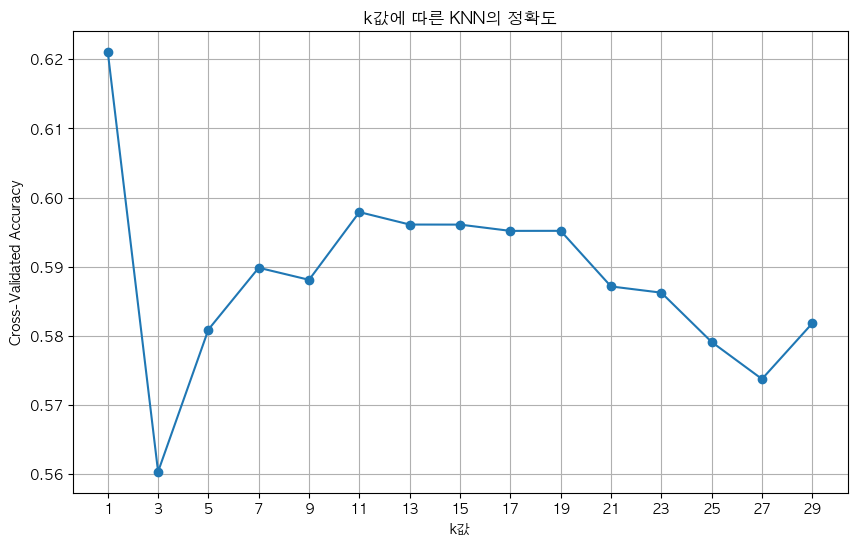

In [7]:
# 과제1) 와인데이터 그래프(k값에 따른 정확도 즉, k-scores 그려보기)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('k값')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k값에 따른 KNN의 정확도')
plt.xticks(k_range)
plt.grid()
plt.show()

In [8]:
# 과제2) 정확도 평가
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Train 정확도: {:.4f}".format(acc_train))
print("Test 정확도: {:.4f}".format(acc_test))

Train 정확도: 1.0000
Test 정확도: 0.6229


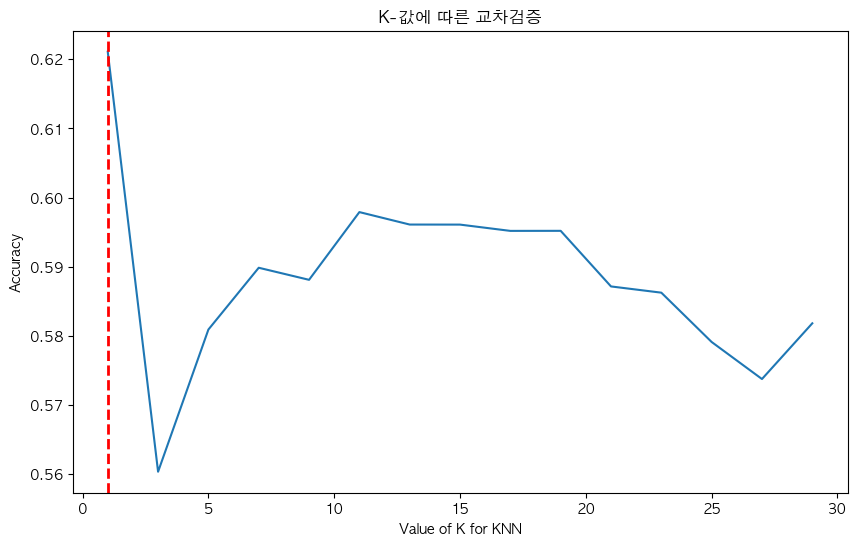

In [9]:
# 과제1 강사님 코드
import matplotlib.pyplot as plt
import matplotlib
plt.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('K-값에 따른 교차검증')
plt.axvline(best_k, color='r', linestyle='--', linewidth=2)
plt.show()

In [10]:
# 과제2 강사님 코드
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Training Aaccracy : {:.3f}'.format(train_acc))
print('Testing Aaccracy : {:.3f}'.format(test_acc))

Training Aaccracy : 1.000
Testing Aaccracy : 0.623


In [11]:
# 기존 데이터는 url을 통해 불러온 값
# import를 통해 가져온 값은 다른 결과를 나타내는 모습을 살펴볼 수 있다.
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

In [12]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings(action='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 최적의 k 찾기
k_range = range(1, 30, 2) # 추가로 (1, 30, 2)로 작업할 때엔 결과가 어떨지 유추해볼 수 있다.
# 위 추가 문제를 통해 굳이 짝수값을 고려할 필요가 없다는 것을 알아낼 수 있다.
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_range[np.argmax(k_scores)]
best_k # 1이 최적으로 잡혀있는 결과 확인

13

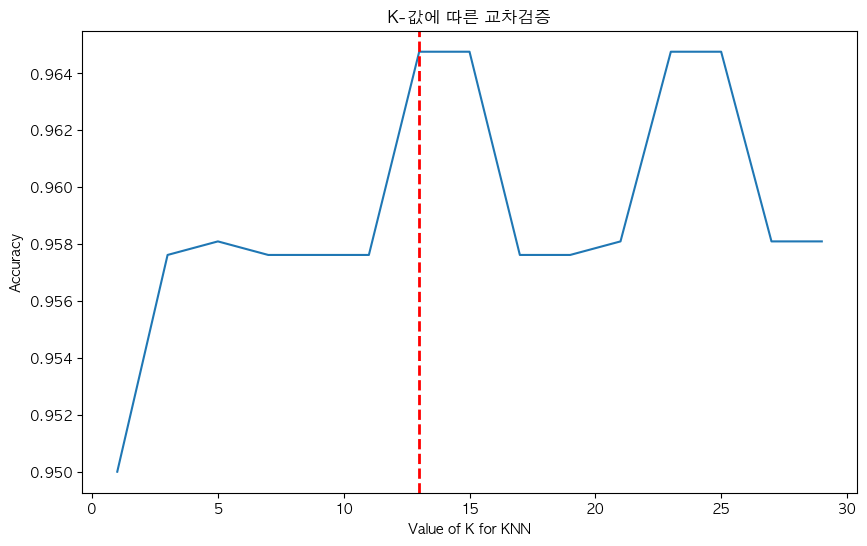

In [13]:
import matplotlib.pyplot as plt
import matplotlib
plt.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('K-값에 따른 교차검증')
plt.axvline(best_k, color='r', linestyle='--', linewidth=2)
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Train 정확도: {:.4f}".format(acc_train))
print("Test 정확도: {:.4f}".format(acc_test))

Train 정확도: 0.9648
Test 정확도: 0.9722


In [15]:
# X의 모든 값을 돌리기엔 시간이 오래 걸린다고 가정하고, 중요 데이터만 선택해준다고 해보자.
X_selected = X[:, :2] # 만약 1, 2번 특성이 중요한 데이터라고 한다면,
scaler = StandardScaler() # 정규화
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k_range = range(1, 31, 2)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

besk_k = k_range[np.argmax(k_scores)]
best_k

13

In [16]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Train 정확도: {:.4f}".format(acc_train))
print("Test 정확도: {:.4f}".format(acc_test))

Train 정확도: 0.8169
Test 정확도: 0.8333


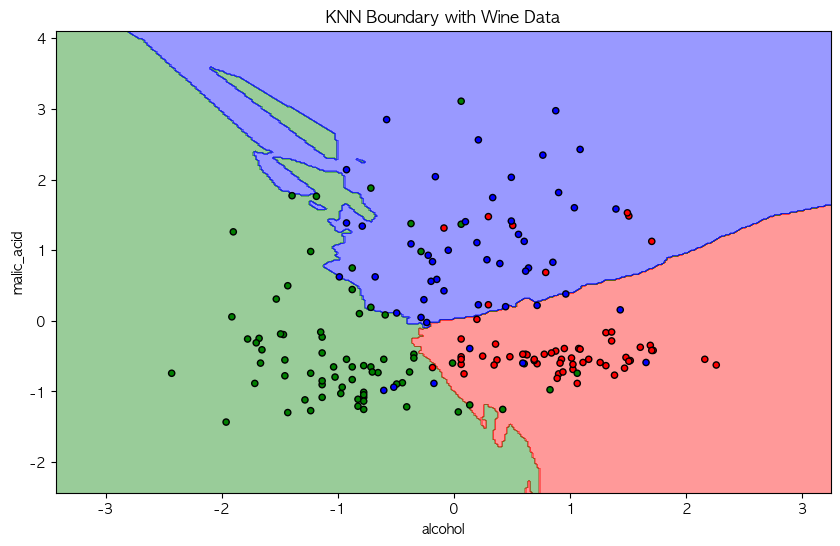

In [17]:
from matplotlib.colors import ListedColormap

# x와 y의 최솟값과 최댓값을 설정하여 그래프의 경계를 지정
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
# 지정된 범위 내에서의 격자 포인트를 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# KNN 분류기를 사용하여 각 격자 포인트의 클래스를 예측
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# 예측된 클래스를 원래의 격자 형태로 변환
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
# 결정경계를 채색하여 시각화
plt.contourf(xx,yy,Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))
# 원본 데이터 포인트를 그래프에 산포도로 나타낸다.
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, edgecolor='k', s=20, cmap=ListedColormap(('red', 'green', 'blue')))
plt.title("KNN Boundary with Wine Data")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()

In [18]:
from sklearn.datasets import load_breast_cancer
from tqdm import tqdm

breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [19]:
breast_cancer.data.shape

(569, 30)

In [20]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['diagnosis'])

In [21]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [24]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [25]:
y['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))
print(y_train['diagnosis'].value_counts(), y_test['diagnosis'].value_counts())

398 171
diagnosis
1    249
0    149
Name: count, dtype: int64 diagnosis
1    108
0     63
Name: count, dtype: int64


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


# KNN
과적합 Overfitting : 데이터의 지역 특성을 지나치게 반영했다. (k가 작다.)
과소적합 Underfitting : 다른 지역의 특성을 너무 많이 포함하여 오분류할 위험이 있다. (k가 크다.)

In [28]:
X_vis = X_train[:, :2]
y_vis = y_train.values.ravel()

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

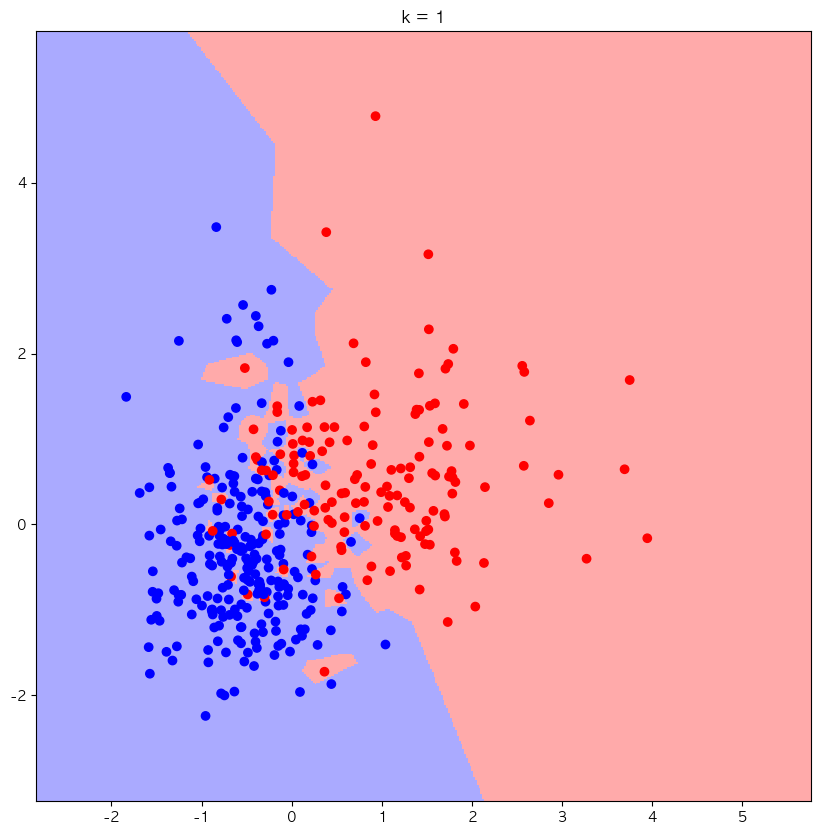

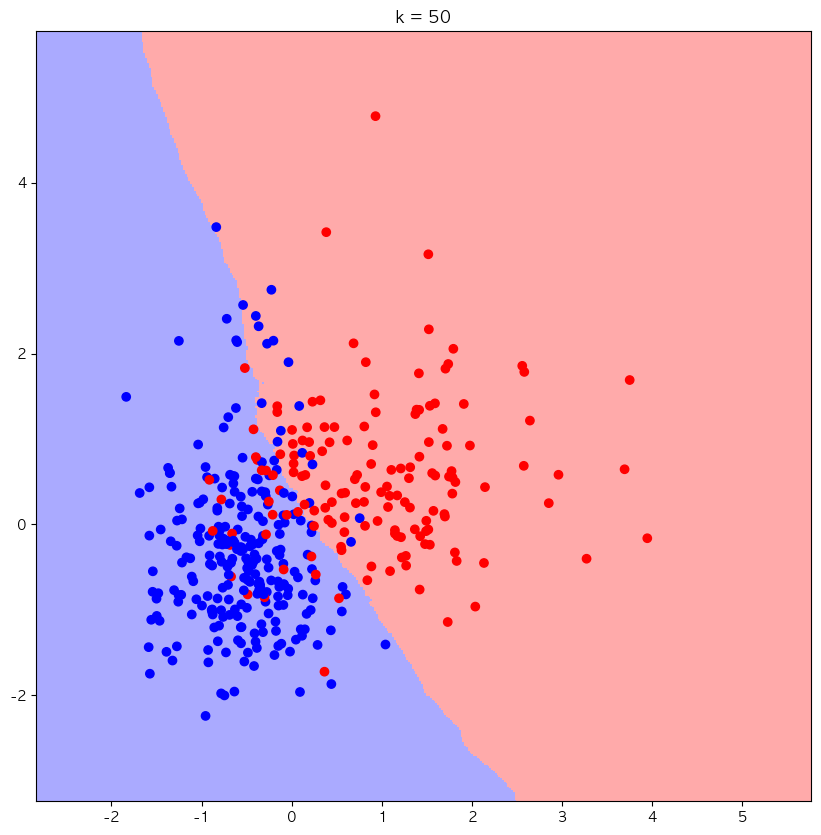

In [29]:
for k in [1, 50]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_vis, y_vis)

    x_min, x_max = X_vis[:,0].min() - 1, X_vis[:,1].max() + 1
    y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'k = {k}')

plt.show()

In [30]:
k_list = [i for i in range(1, 50) if i%2 != 0]
cv_scores = []

for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2)
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

100%|███████████████████████████████████████████| 25/25 [00:01<00:00, 24.66it/s]


In [31]:
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)] 
best_k

[5]

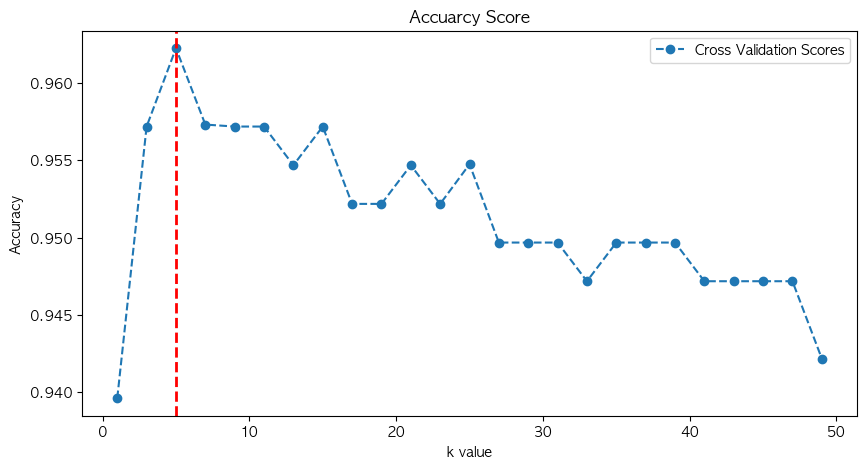

In [32]:
plt.figure(figsize=(10,5))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuarcy Score')
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.legend(['Cross Validation Scores'])
plt.show()

In [33]:
# Euclidean Distance(x, y값 간의 차이의 제곱합의 제곱근, 두 점 사이의 직선거리)
k_list = [i for i in range(1, 50) if i%2 != 0]
euc = []

for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2)
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    euc.append(scores.mean())

100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 32.01it/s]


In [34]:
# Manhattan Distance(멘헤튼, x에서 y로 이동시 축 방향으로만 이동할 경우의 거리)(직선거리)
man = []

for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    man.append(scores.mean())

100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 36.24it/s]


In [35]:
print(euc)
print(man)

[0.9396153846153845, 0.9571794871794872, 0.9622435897435897, 0.9573076923076922, 0.9571794871794872, 0.9571794871794872, 0.9546794871794871, 0.9571794871794872, 0.9521794871794871, 0.9521794871794871, 0.9546794871794871, 0.9521794871794871, 0.9547435897435896, 0.9496794871794872, 0.9496794871794872, 0.9496794871794872, 0.9471794871794872, 0.9496794871794872, 0.9496794871794872, 0.9496794871794872, 0.9471794871794872, 0.9471794871794872, 0.9471794871794872, 0.9471794871794872, 0.9421794871794871]
[0.9573076923076924, 0.9621794871794872, 0.9647435897435898, 0.9521794871794871, 0.9546794871794871, 0.9546794871794871, 0.9546794871794871, 0.9521794871794871, 0.9496794871794872, 0.9496794871794872, 0.9522435897435898, 0.9547435897435896, 0.9547435897435896, 0.9547435897435896, 0.9521794871794871, 0.9496153846153845, 0.9471794871794872, 0.9471794871794872, 0.9471794871794872, 0.9471794871794872, 0.9471794871794872, 0.9496794871794872, 0.9496794871794872, 0.9471794871794872, 0.9471794871794872

In [36]:
# 스피어먼 거리(Spearman Correlation Distance) 1 - p
from scipy.stats import spearmanr

def spearmancorr(x, y):
    rho, pval = spearmanr(x, y, axis=0)
    return 1-rho

# 06.11.
### KNN 회귀

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_openml

import warnings
warnings.filterwarnings(action='ignore')

In [109]:
boston = fetch_openml(name='boston', version=1, as_frame=True)

In [110]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
k_list = [i for i in range(1, 100) if i%2 != 0]
cv_scores = [] # 점수 저장 리스트

In [113]:
from tqdm import tqdm # 진행률 프로세스 바
from sklearn.model_selection import cross_val_score

In [114]:
for k in tqdm(k_list):
    regressor = KNeighborsRegressor(n_neighbors = k, p=2) # p : 거리를 어떠한 식으로 구할지(유클리디언)
    scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='r2')
    cv_scores.append(scores.mean())

100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 46.77it/s]


In [120]:
best_k = [i for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)] # 최대값의 인덱스 번호 가져오기
best_k

[3]

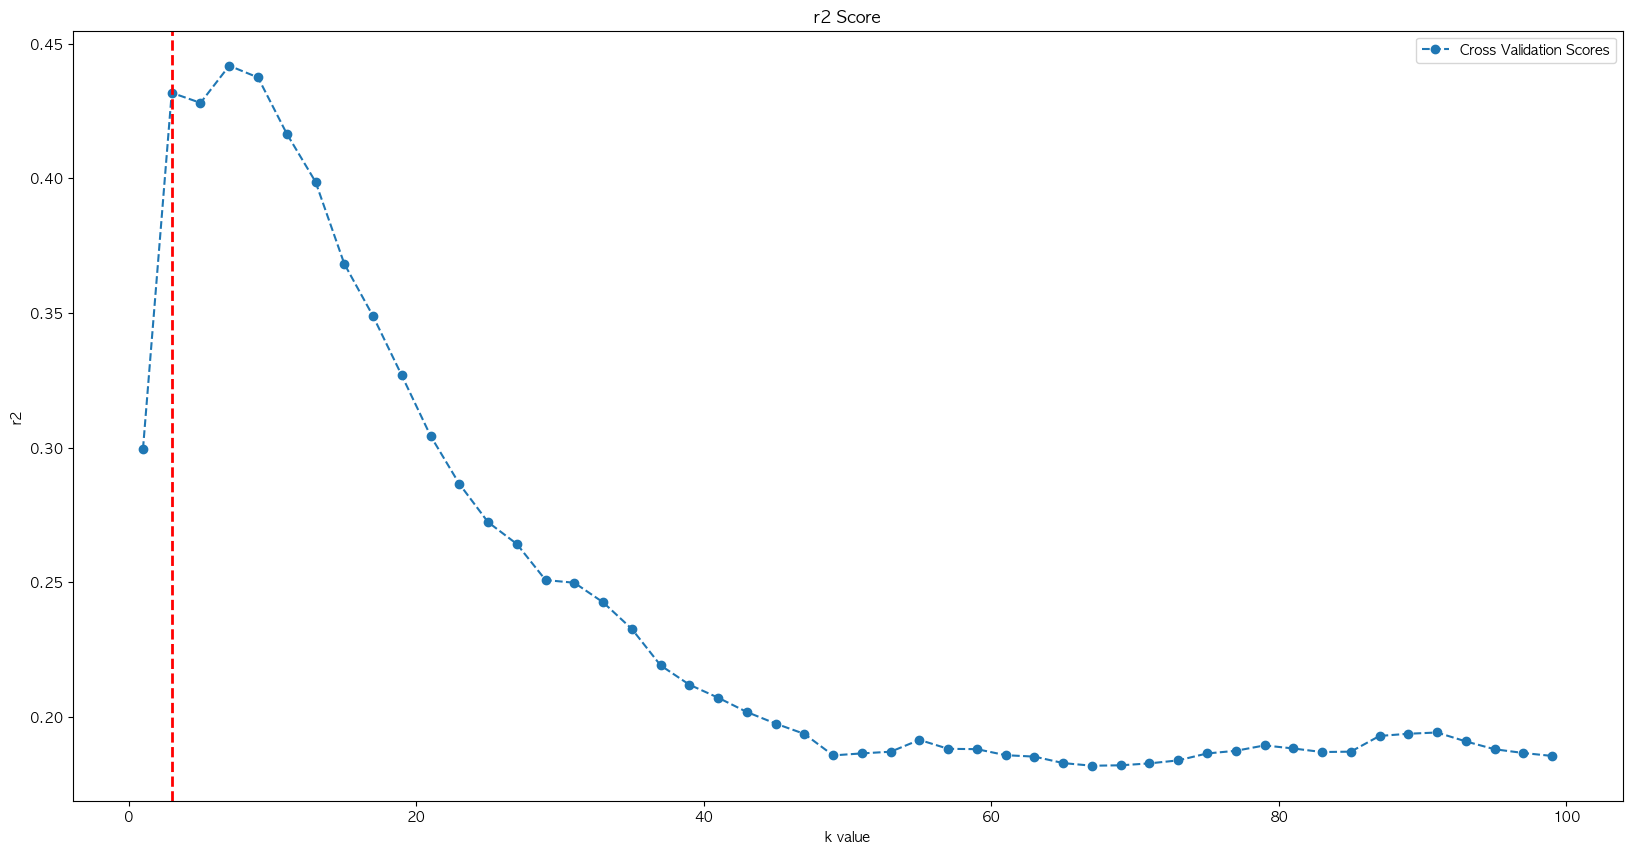

In [122]:
# R2 스코어 그래프
plt.figure(figsize=(20,10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('k value')
plt.ylabel('r2')
plt.title('r2 Score')
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.legend(['Cross Validation Scores'])
plt.show()